In [107]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [109]:
df.info() # Check No Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [110]:
df.shape # Too Small Dataset

(301, 9)

In [111]:
missing = df.isnull().sum().sort_values(ascending = False)
missing

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

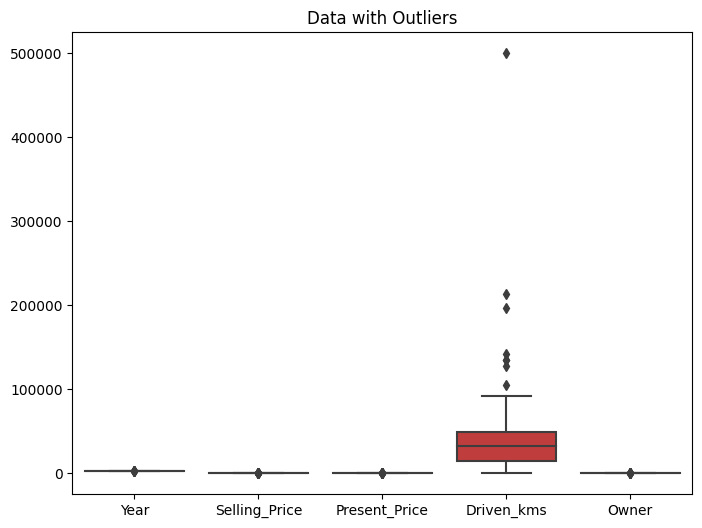

In [112]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show() # No Outliers in the data

In [113]:
Q1 = df['Driven_kms'].quantile(0.25)
Q3 = df['Driven_kms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Driven_kms'] >= lower_bound) & (df['Driven_kms'] <= upper_bound)]

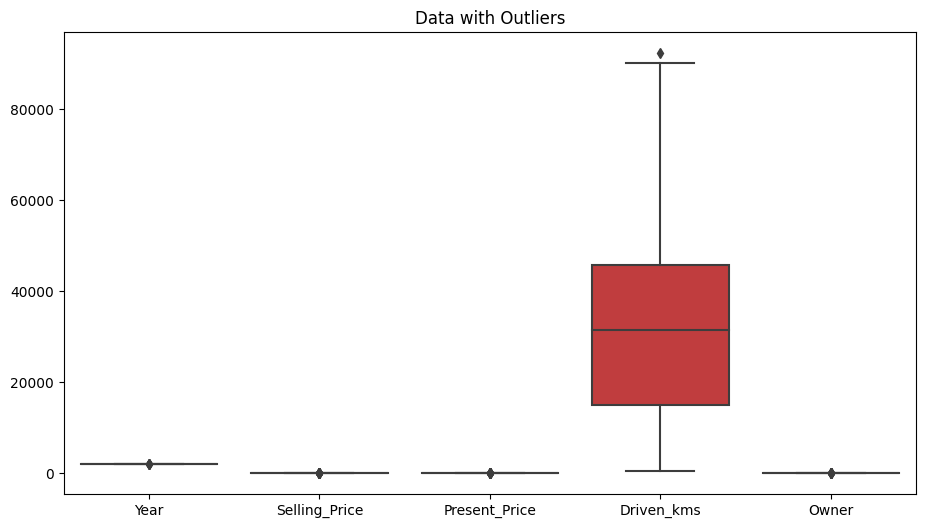

In [114]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show() # No Outliers in the data

## Build Model


In [115]:
label_encoder = LabelEncoder()

# Transform the 'y' column
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])



df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,87,2014,3.35,5.59,27000,2,0,1,0
1,90,2013,4.75,9.54,43000,1,0,1,0
2,66,2017,7.25,9.85,6900,2,0,1,0
3,93,2011,2.85,4.15,5200,2,0,1,0
4,89,2014,4.60,6.87,42450,1,0,1,0
5,92,2018,9.25,9.83,2071,1,0,1,0
6,66,2015,6.75,8.12,18796,2,0,1,0
7,88,2015,6.50,8.61,33429,1,0,1,0
8,66,2016,8.75,8.89,20273,1,0,1,0
9,66,2015,7.45,8.92,42367,1,0,1,0


In [116]:
df = df.drop('Owner', axis=1)



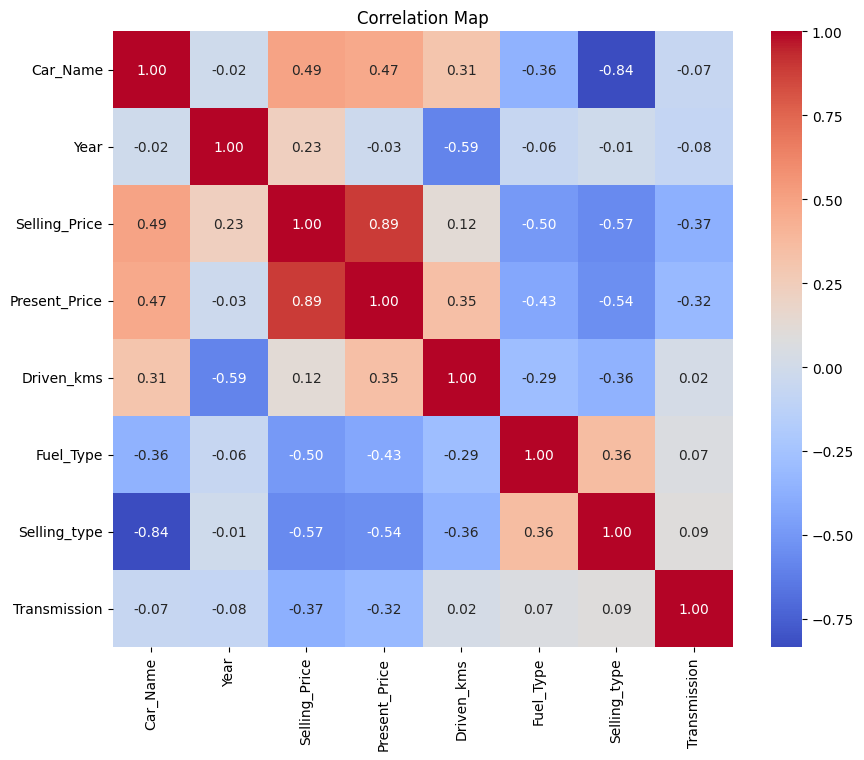

In [117]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map')
plt.show()

In [118]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [119]:
X, y = shuffle(X, y, random_state=101)  # Randomly shuffles the data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

lg = LinearRegression()

#Fit the model
clf = lg.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [120]:
# Optionally, calculate and print some evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.142391536508772
R-squared: 0.8599486916928039
